# Today's Feeling

Milestones 2 - Phase 2

by Muhammad Garin Anzahabi

# Libraries

In [87]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [167]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import numpy as np
from numpy import mean
from numpy.lib.function_base import median
import transformers

# For Data Preprocessing
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


# For Encoding
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from tensorflow.keras.layers import TextVectorization, Embedding

from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU
from tensorflow.keras.models import Model, Sequential

# For report
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

## Downloads

In [89]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [91]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [92]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Data Loading

In [93]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [94]:
!cp /content/kaggle.json ~/.kaggle

In [95]:
!kaggle datasets download -d atharvjairath/empathetic-dialogues-facebook-ai

empathetic-dialogues-facebook-ai.zip: Skipping, found more recently modified local copy (use --force to force download)


In [96]:
!chmod 600 /root/.kaggle/kaggle.json

In [97]:
!unzip -q /content/empathetic-dialogues-facebook-ai.zip -d dataset

replace dataset/emotion-emotion_69k.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [98]:
Data= pd.read_csv('/content/dataset/emotion-emotion_69k.csv')

In [99]:
Data.head()

,Unnamed: 0,Situation,emotion,empathetic_dialogues,labels,Unnamed: 5,Unnamed: 6
0,0,I remember going to the fireworks with my best...,sentimental,Customer :I remember going to see the firework...,"Was this a friend you were in love with, or ju...",NaN,NaN
1,1,I remember going to the fireworks with my best...,sentimental,Customer :This was a best friend. I miss her.\...,Where has she gone?,NaN,NaN
2,2,I remember going to the fireworks with my best...,sentimental,Customer :We no longer talk.\nAgent :,Oh was this something that happened because of...,NaN,NaN
3,3,I remember going to the fireworks with my best...,sentimental,Customer :Was this a friend you were in love w...,This was a best friend. I miss her.,NaN,NaN
4,4,I remember going to the fireworks with my best...,sentimental,Customer :Where has she gone?\nAgent :,We no longer talk.,NaN,NaN


# Objective

This dataset that shows a conversations grounded in emotional situations to facilitate training and evaluating dialogue system. In my case here, we were not gonna use the dialogues, because we are not goona bulid a chatbot, we only going to ``build an NLP model for predicting somebody feeling based on the 'Situation' data``, because it already shows the main idea of one dialogues.

# Data Cleaning

In [100]:
Data.head()

,Unnamed: 0,Situation,emotion,empathetic_dialogues,labels,Unnamed: 5,Unnamed: 6
0,0,I remember going to the fireworks with my best...,sentimental,Customer :I remember going to see the firework...,"Was this a friend you were in love with, or ju...",NaN,NaN
1,1,I remember going to the fireworks with my best...,sentimental,Customer :This was a best friend. I miss her.\...,Where has she gone?,NaN,NaN
2,2,I remember going to the fireworks with my best...,sentimental,Customer :We no longer talk.\nAgent :,Oh was this something that happened because of...,NaN,NaN
3,3,I remember going to the fireworks with my best...,sentimental,Customer :Was this a friend you were in love w...,This was a best friend. I miss her.,NaN,NaN
4,4,I remember going to the fireworks with my best...,sentimental,Customer :Where has she gone?\nAgent :,We no longer talk.,NaN,NaN


Hence in here, the target is the 'emotion' columns

## Target Overview

In [101]:
Target = Data[['emotion']]

In [102]:
res = (Target
       .apply(lambda x: x.value_counts()) # column by column value_counts would be applied
       .stack()
       .reset_index(level=0).sort_index(axis=0)
       .rename(columns={'level_0': 'Value', 0: 'value_counts'}))

res['Id'] = res.groupby(level=0).cumcount()
res.set_index('Id', append=True)

Value  value_counts
        Id                                                                 
emotion 0                                           surprised          3295
        1                                             excited          2465
        2                                               angry          2296
        3                                               proud          2247
        4                                             annoyed          2213
        5                                                 sad          2213
        6                                              lonely          2106
        7                                              afraid          2094
        8                                            grateful          2091
        9                                           terrified          2074
        10                                             guilty          2053
        11                                            furious          2045
        12                                          disgusted          2044
        13                                          confident          2037
        14                                            anxious          2037
        15                                       anticipating          2026
        16                                            hopeful          2019
        17                                          impressed          2004
        18                                          nostalgic          1996
        19                                       disappointed          1969
        20                                            jealous          1955
        21                                             joyful          1953
        22                                           prepared          1937
        23                                            content          1903
        24                                         devastated          1856
        25                                        embarrassed          1844
        26                                        sentimental          1773
        27                                             caring          1765
        28                                           trusting          1755
        29                                            ashamed          1694
        30                                       apprehensive          1549
        31                                           faithful          1283
        32                           t even like scary things             5
        33  t believe my daughter taught herself how to pl...             5
        34                                I really killed it!             4
        35  t believe I like the show Power so much. I was...             4
        36                   t think I wold like super heroes             4
        37   but what I didn't know was that he was workin...             4
        38                     we were in a different country             3
        39    time to jump on the motorcycle and go cruising!             3
        40   a boy.  I hear all these different labor stor...             3
        41  m so mad with my brother. He stole from me and...             3
        42                                                  (             3

As we can see there are some of the value that did not represented any feeling of a person, i assumed there were some missplaced data in the columns because the value of it only shows about 5 or less data

In [103]:
# Show all the missplaced data (5 or lower)

counts = Data['emotion'].value_counts(dropna=False) 
valids = counts[counts<=5].index

less = Data[Data['emotion'].isin(valids)]
less

,Unnamed: 0,Situation,emotion,empathetic_dialogues,labels,Unnamed: 5,Unnamed: 6
1419,1419,I had a great day at work today,I really killed it!,confident,Customer :I had a great day at work today! We...,"That's really awesome, what makes it so complex?",NaN
1420,1420,I had a great day at work today,I really killed it!,confident,Customer :There are many different variables t...,Well that's really great that you were able to...,NaN
1421,1421,I had a great day at work today,I really killed it!,confident,"Customer :That's really awesome, what makes it...",There are many different variables that need t...,NaN
1422,1422,I had a great day at work today,I really killed it!,confident,Customer :Well that's really great that you we...,Not usually,this is an unusual case!
2546,2546,I ran into my old school mate outside the cou...,we were in a different country,surprised,Customer :How believable do you think this is ...,i think that would be very unbelievable to run...,NaN
2547,2547,I ran into my old school mate outside the cou...,we were in a different country,surprised,"Customer :Of course yes, that is what i just s...",wow that is awesome where you good friends wit...,NaN
2548,2548,I ran into my old school mate outside the cou...,we were in a different country,surprised,Customer :i think that would be very unbelieva...,"Of course yes, that is what i just said happen...",NaN
3722,3722,I've been watching the new stephen king show. ...,t even like scary things,terrified,"Customer :I don't watch scary shows, but I hav...","Yes, I watch the show. That is a bit scary tho...",NaN
3723,3723,I've been watching the new stephen king show. ...,t even like scary things,terrified,Customer :The first episode was fine but I don...,"Ohh come on its not that scary, you should wat...",NaN
3724,3724,I've been watching the new stephen king show. ...,t even like scary things,terrified,Customer :You don't know me lol\nAgent :,"Haha, Ok as you wish then",NaN


In [104]:
less.shape

(45, 7)

Because the missplaced data only contains right about 45 rows, thus i will drop all of it cause it only takes a small amount from the data

In [105]:
# the New Data

NewData = Data[~Data['emotion'].isin(valids)]
NewData

,Unnamed: 0,Situation,emotion,empathetic_dialogues,labels,Unnamed: 5,Unnamed: 6
0,0,I remember going to the fireworks with my best...,sentimental,Customer :I remember going to see the firework...,"Was this a friend you were in love with, or ju...",NaN,NaN
1,1,I remember going to the fireworks with my best...,sentimental,Customer :This was a best friend. I miss her.\...,Where has she gone?,NaN,NaN
2,2,I remember going to the fireworks with my best...,sentimental,Customer :We no longer talk.\nAgent :,Oh was this something that happened because of...,NaN,NaN
3,3,I remember going to the fireworks with my best...,sentimental,Customer :Was this a friend you were in love w...,This was a best friend. I miss her.,NaN,NaN
4,4,I remember going to the fireworks with my best...,sentimental,Customer :Where has she gone?\nAgent :,We no longer talk.,NaN,NaN
...,...,...,...,...,...,...,...
64631,64631,I found some pictures of my grandma in the att...,sentimental,Customer :Did you find anything great?\nAgent :,Yeah I found some old pictures of when us kids...,NaN,NaN
64632,64632,I found some pictures of my grandma in the att...,sentimental,Customer :What a wonderful memory. \nAgent :,Yeah reminds me of the good old days. I miss ...,NaN,NaN
64633,64633,I woke up this morning to my wife telling me s...,surprised,Customer :I woke up this morning to my wife te...,Oh hey that's awesome! That is awesome right?,NaN,NaN
64634,64634,I woke up this morning to my wife telling me s...,surprised,Customer :It is soooo awesome. We have been w...,That is awesome!!!! Congratulations!,NaN,NaN


In [106]:
Target = NewData[['emotion']]

In [107]:
res = (Target
       .apply(lambda x: x.value_counts()) # column by column value_counts would be applied
       .stack()
       .reset_index(level=0).sort_index(axis=0)
       .rename(columns={'level_0': 'Value', 0: 'value_counts'}))

res['Id'] = res.groupby(level=0).cumcount()
res.set_index('Id', append=True)

Value  value_counts
        Id                            
emotion 0      surprised          3295
        1        excited          2465
        2          angry          2296
        3          proud          2247
        4        annoyed          2213
        5            sad          2213
        6         lonely          2106
        7         afraid          2094
        8       grateful          2091
        9      terrified          2074
        10        guilty          2053
        11       furious          2045
        12     disgusted          2044
        13     confident          2037
        14       anxious          2037
        15  anticipating          2026
        16       hopeful          2019
        17     impressed          2004
        18     nostalgic          1996
        19  disappointed          1969
        20       jealous          1955
        21        joyful          1953
        22      prepared          1937
        23       content          1903
        24    devastated          1856
        25   embarrassed          1844
        26   sentimental          1773
        27        caring          1765
        28      trusting          1755
        29       ashamed          1694
        30  apprehensive          1549
        31      faithful          1283

After this we are going to reduce or classify these all 32 target,  because 32 target its just too many and can cause a cardinality that makes the prediction bad.

We are going to reduce these target into 4 Target based on researched by Institue of Neuroscience and Psychology at the University of Glasgow, which is:
1. Happiness
2. Sadness
3. Fear / Surprise
4. Anger / Disgust


(https://www.theatlantic.com/health/archive/2014/02/new-research-says-there-are-only-four-emotions/283560/)

In [108]:
NewData['emotion'] = NewData['emotion'].replace(['caring', 'trusting', 'faithful', 'excited', 'proud', 'grateful', 'confident', 'anticipating', 'hopeful', 'impressed', 'nostalgic', 'joyful', 'prepared', 'content'], 'happiness')
NewData['emotion'] = NewData['emotion'].replace(['sad', 'lonely', 'guilty', 'disappointed', 'devastated', 'embarrassed', 'sentimental'], 'sadness')
NewData['emotion'] = NewData['emotion'].replace(['ashamed', 'apprehensive', 'surprised', 'afraid', 'terrified', 'anxious'], 'fear/surprise')
NewData['emotion'] = NewData['emotion'].replace(['angry', 'annoyed', 'furious', 'disgusted', 'jealous'], 'anger/disgust')

<ipython-input-108-62491828914f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-108-62491828914f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-108-62491828914f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-108-624

In [109]:
NewData['emotion'].value_counts()

happiness        27481
sadness          13814
fear/surprise    12743
anger/disgust    10553
Name: emotion, dtype: int64

Then after that i will drop the 'Unnamed 0' columns because its the same value as Id

In [110]:
NewData = NewData.drop(['Unnamed: 0'], axis=1)
NewData

,Situation,emotion,empathetic_dialogues,labels,Unnamed: 5,Unnamed: 6
0,I remember going to the fireworks with my best...,sadness,Customer :I remember going to see the firework...,"Was this a friend you were in love with, or ju...",NaN,NaN
1,I remember going to the fireworks with my best...,sadness,Customer :This was a best friend. I miss her.\...,Where has she gone?,NaN,NaN
2,I remember going to the fireworks with my best...,sadness,Customer :We no longer talk.\nAgent :,Oh was this something that happened because of...,NaN,NaN
3,I remember going to the fireworks with my best...,sadness,Customer :Was this a friend you were in love w...,This was a best friend. I miss her.,NaN,NaN
4,I remember going to the fireworks with my best...,sadness,Customer :Where has she gone?\nAgent :,We no longer talk.,NaN,NaN
...,...,...,...,...,...,...
64631,I found some pictures of my grandma in the att...,sadness,Customer :Did you find anything great?\nAgent :,Yeah I found some old pictures of when us kids...,NaN,NaN
64632,I found some pictures of my grandma in the att...,sadness,Customer :What a wonderful memory. \nAgent :,Yeah reminds me of the good old days. I miss ...,NaN,NaN
64633,I woke up this morning to my wife telling me s...,fear/surprise,Customer :I woke up this morning to my wife te...,Oh hey that's awesome! That is awesome right?,NaN,NaN
64634,I woke up this morning to my wife telling me s...,fear/surprise,Customer :It is soooo awesome. We have been w...,That is awesome!!!! Congratulations!,NaN,NaN


And then in here we only take the 'Situation' and 'emotion' columns because the rest it sows an entire conversation

In [111]:
NewData = NewData[['Situation', 'emotion']]
NewData

,Situation,emotion
0,I remember going to the fireworks with my best...,sadness
1,I remember going to the fireworks with my best...,sadness
2,I remember going to the fireworks with my best...,sadness
3,I remember going to the fireworks with my best...,sadness
4,I remember going to the fireworks with my best...,sadness
...,...,...
64631,I found some pictures of my grandma in the att...,sadness
64632,I found some pictures of my grandma in the att...,sadness
64633,I woke up this morning to my wife telling me s...,fear/surprise
64634,I woke up this morning to my wife telling me s...,fear/surprise


## Dataset Overview

In [112]:
bench = NewData[['Situation']]

In [113]:
res = (bench
       .apply(lambda x: x.value_counts()) # column by column value_counts would be applied
       .stack()
       .reset_index(level=0).sort_index(axis=0)
       .rename(columns={'level_0': 'Value', 0: 'value_counts'}))

res['Id'] = res.groupby(level=0).cumcount()
res.set_index('Id', append=True)

Value  \
          Id                                                         
Situation 0      i knew i shouldnt have trusted my brother with...   
          1                  i loved taking care of my sisters pet   
          2                                                      1   
          3           Someone cut me off in traffic the other day.   
          4      I get sentimental about my family, they mean a...   
...                                                            ...   
          19190  I was thinkinng about my dog lately, I had to ...   
          19191  I found a lost kitten and I took it to my hous...   
          19192  My cat had to be put down last week. She was i...   
          19193  I never share my treats with my kids. They sho...   
          19194  I went to an aviation show the other day and w...   

                 value_counts  
          Id                   
Situation 0                48  
          1                46  
          2                32  
          3                27  
          4                26  
...                       ...  
          19190             2  
          19191             2  
          19192             1  
          19193             1  
          19194             1  

[19195 rows x 2 columns]

As for the dataset, you can see there is a strange value that did not match the context, there is a number on the dataset (1). Which i think there are probably another number in the column.

In [114]:
typo_number = NewData.loc[NewData['Situation'].isin(['1', '2', '3','4','5','6','7','8','9'])]
typo_number

,Situation,emotion
1735,1,sadness
1736,1,sadness
1737,1,sadness
2760,2,happiness
2761,2,happiness
...,...,...
54589,3,sadness
54590,3,sadness
54591,3,sadness
54592,3,sadness


Which it turns out there are three types of number on the columns, because it only contains 68 rows of data, thus i will drop all of it

In [115]:
NewData = NewData[~NewData['Situation'].isin(typo_number.Situation)]
NewData

,Situation,emotion
0,I remember going to the fireworks with my best...,sadness
1,I remember going to the fireworks with my best...,sadness
2,I remember going to the fireworks with my best...,sadness
3,I remember going to the fireworks with my best...,sadness
4,I remember going to the fireworks with my best...,sadness
...,...,...
64631,I found some pictures of my grandma in the att...,sadness
64632,I found some pictures of my grandma in the att...,sadness
64633,I woke up this morning to my wife telling me s...,fear/surprise
64634,I woke up this morning to my wife telling me s...,fear/surprise


Then after that, because all this 'Situation' columns is the same based on the topic of the dialogues, so it multiply for every rows that still in the same topic. Thus i will only use the first rows of every topic for my data.

In [116]:
NewData = NewData.groupby('Situation').first().reset_index()
NewData

,Situation,emotion
0,I used to be afraid of the dark but now I am...,fear/surprise
1,A driver brushed my car with his car and did ...,anger/disgust
2,A motorist ride his bike at a extreme speed w...,anger/disgust
3,A nice storm came through here today and tota...,happiness
4,A stitch in time saves nine,happiness
...,...,...
19187,yesterday I made the bed with new sheets and c...,happiness
19188,yesterday after work i decided to walk to the ...,sadness
19189,yesterday at work some guy ran his work truck ...,happiness
19190,yesterday i ran into a friend and i was shocke...,fear/surprise


Lastly Check if there are any missing value nor duplicated value in the dataset

## Duplicated or Missing Value

In [117]:
NewData.isnull().sum()

Situation    0
emotion      0
dtype: int64

In [118]:
NewData.duplicated().sum()

0

There are no duplicated nor missing value on the dataset

Hence here are my NewData after cleaning

In [119]:
NewData

,Situation,emotion
0,I used to be afraid of the dark but now I am...,fear/surprise
1,A driver brushed my car with his car and did ...,anger/disgust
2,A motorist ride his bike at a extreme speed w...,anger/disgust
3,A nice storm came through here today and tota...,happiness
4,A stitch in time saves nine,happiness
...,...,...
19187,yesterday I made the bed with new sheets and c...,happiness
19188,yesterday after work i decided to walk to the ...,sadness
19189,yesterday at work some guy ran his work truck ...,happiness
19190,yesterday i ran into a friend and i was shocke...,fear/surprise


# EDA

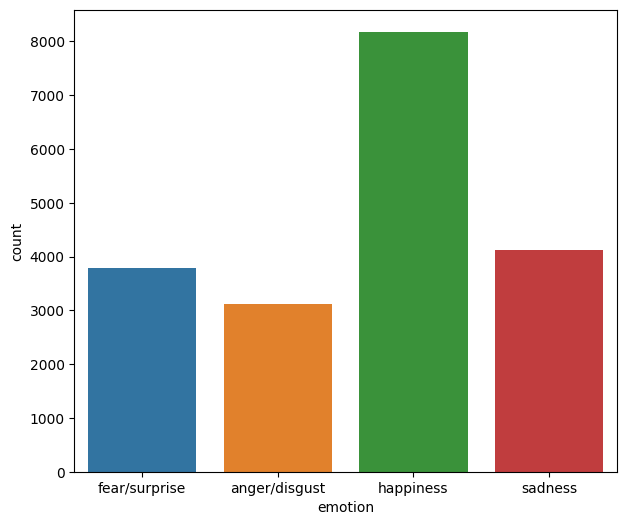

In [120]:
plt.figure(figsize = (7,6)) 
sns.countplot(data=NewData, x = 'emotion')

In [121]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [122]:
most_common_uni = get_top_text_ngrams(NewData.Situation,20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Words" , 'Total'])
temp["Words"] = list(most_common_uni.keys())
temp["Total"] = list(most_common_uni.values())
fig = px.bar(temp, x="Total", y="Words", title='Most common Words', orientation='h', 
             width=700, height=700,color='Words')
fig.show()

A word cloud (also known as a tag cloud or text cloud) is a visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

In [123]:
# Workcloud

# slicing
happy_review = NewData[NewData.emotion=='happiness']['Situation']
sad_review = NewData[NewData.emotion=='sadness']['Situation']
fear_review = NewData[NewData.emotion=='fear/surprise']['Situation']
anger_review = NewData[NewData.emotion=='anger/disgust']['Situation']

# Merge into one list
join_h_prep = '. '.join(list(happy_review.values))
join_s_prep = '. '.join(list(sad_review.values))
join_f_prep = '. '.join(list(fear_review.values))
join_a_prep = '. '.join(list(anger_review.values))

# happy
with open('join_sui_prep.txt', 'w') as f:
    f.write(join_h_prep)
# sad
with open('join_not_prep.txt', 'w') as f:
    f.write(join_s_prep)
# fear
with open('join_sui_prep.txt', 'w') as f:
    f.write(join_f_prep)
# anger
with open('join_not_prep.txt', 'w') as f:
    f.write(join_a_prep)

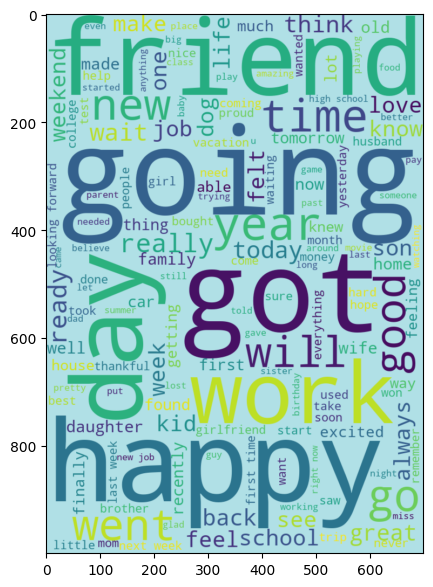

In [124]:
# Happiness
plt.figure(figsize = (7,7)) 

w_cloud = WordCloud(background_color='powderblue', min_font_size = 3,
                    max_words = 150 , width = 700 ,
                    height = 1000).generate(" ".join(happy_review))

plt.imshow(w_cloud,interpolation = 'bilinear')

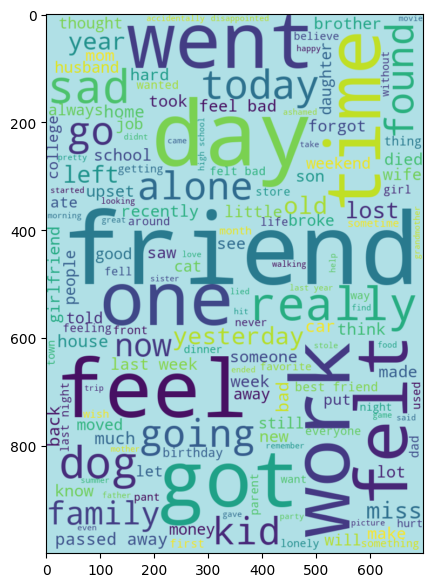

In [125]:
# Sadness
plt.figure(figsize = (7,7)) 

w_cloud = WordCloud(background_color='powderblue', min_font_size = 3,
                    max_words = 150 , width = 700 ,
                    height = 1000).generate(" ".join(sad_review))

plt.imshow(w_cloud,interpolation = 'bilinear')

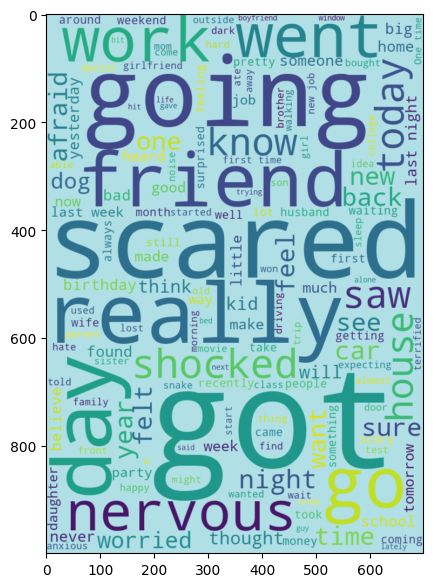

In [126]:
# Fear
plt.figure(figsize = (7,7)) 

w_cloud = WordCloud(background_color='powderblue', min_font_size = 3,
                    max_words = 150 , width = 700 ,
                    height = 1000).generate(" ".join(fear_review))

plt.imshow(w_cloud,interpolation = 'bilinear')

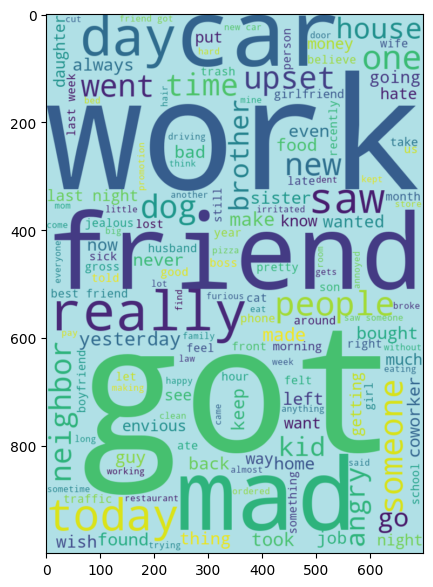

In [127]:
# Anger
plt.figure(figsize = (7,7)) 

w_cloud = WordCloud(background_color='powderblue', min_font_size = 3,
                    max_words = 150 , width = 700 ,
                    height = 1000).generate(" ".join(anger_review))

plt.imshow(w_cloud,interpolation = 'bilinear')

The following can be inferred from the data:

1. The dataset imbalance, as you can see the happiness label striking high compare to any label.
2. The dataset contains many many stopwords, because the most common words mostly filled by the stopwords.
3. The dataset contains words that really dominate in every class such as happy on 'happiness' or scared on 'fear', this means that this data can works on model that use ranks.


Thus we go to the data preprocessing

# Data Preprocessing

The preprocessing that i will do it includes:
1. Lowercase, so does the model did not read same two words differently just because the uppercase and lower from one word
2. Remove Punctuation and Stopwords, because it doesnt have any value for the model
3. Tokenization, For splitting all the sentences to words
4. Lematization, for turning all the verb 2 verb 3 etc to the first version of the word

In [128]:
stpwds_id = list(set(stopwords.words('english')))
lemmatizer=WordNetLemmatizer()

In [129]:
def preprocess(Text):
  Text = Text.lower()
  Text = Text.translate(str.maketrans("","",string.punctuation))
  Text = Text.strip()
  tokens = word_tokenize(Text)
  Text = ' '.join([word for word in tokens if word not in stpwds_id])
  Text = lemmatizer.lemmatize(Text)
  return Text

Thus here are the result

In [130]:
NewData['Situation_Preprocessed'] = NewData['Situation'].apply(lambda x: preprocess(x))
NewData

,Situation,emotion,Situation_Preprocessed
0,I used to be afraid of the dark but now I am...,fear/surprise,used afraid dark much nightlight long time
1,A driver brushed my car with his car and did ...,anger/disgust,driver brushed car car stop apologize fix car
2,A motorist ride his bike at a extreme speed w...,anger/disgust,motorist ride bike extreme speed without contr...
3,A nice storm came through here today and tota...,happiness,nice storm came today totally knocked piece ca...
4,A stitch in time saves nine,happiness,stitch time saves nine
...,...,...,...
19187,yesterday I made the bed with new sheets and c...,happiness,yesterday made bed new sheets comforter last n...
19188,yesterday after work i decided to walk to the ...,sadness,yesterday work decided walk store get grocerie...
19189,yesterday at work some guy ran his work truck ...,happiness,yesterday work guy ran work truck building
19190,yesterday i ran into a friend and i was shocke...,fear/surprise,yesterday ran friend shocked couldnt find anyt...


And then i will do target convert with label encoder

## Convert Target

In [131]:
LabelEncoder = LabelEncoder()
NewData['label'] = LabelEncoder.fit_transform(NewData['emotion'])

In [132]:
NewData.head()

,Situation,emotion,Situation_Preprocessed,label
0,I used to be afraid of the dark but now I am...,fear/surprise,used afraid dark much nightlight long time,1
1,A driver brushed my car with his car and did ...,anger/disgust,driver brushed car car stop apologize fix car,0
2,A motorist ride his bike at a extreme speed w...,anger/disgust,motorist ride bike extreme speed without contr...,0
3,A nice storm came through here today and tota...,happiness,nice storm came today totally knocked piece ca...,2
4,A stitch in time saves nine,happiness,stitch time saves nine,2


In [133]:
NewData['label'].unique()

array([1, 0, 2, 3])

All the emotion encode into:
1. Anger / Disgust = 0
2. Fear / Surprise = 1
3. Happiness = 2
4. Sadness = 3

# Vectorization

## Data Splitting

In here i will do a data splitting for my dataset into train and tes

In [134]:
X_train, X_test, y_train, y_test = train_test_split(NewData.Situation_Preprocessed, 
                                                    NewData.label, 
                                                    test_size=0.25, 
                                                    random_state=46, 
                                                    stratify=NewData.label)

In [135]:
print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (14394,)
Test Size  :  (4798,)


for the next cell, i will use countvectorizer only for counting all the vocab and the central tendency of the words

In [136]:
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<14394x9260 sparse matrix of type '<class 'numpy.int64'>'
	with 117868 stored elements in Compressed Sparse Row format>

In [168]:
jml_vocab = len(Vectorize.vocabulary_.keys())

print("Vocab Total:",jml_vocab)

Vocab Total: 9260


In [169]:
max_sen_len = max([len(i.split(" ")) for i in X_train])
mean_sen_len = mean([len(i.split(" ")) for i in X_train])
median_sen_len = median([len(i.split(" ")) for i in X_train])

print("Max lenght of the words:",max_sen_len,"kata")
print("Mean lenght of the words:",mean_sen_len,"kata")
print("Median lenght of the words:",median_sen_len,"kata")

Max lenght of the words: 46 kata
Mean lenght of the words: 8.407044601917466 kata
Median lenght of the words: 7.0 kata


I can conclude 2 things from the above:
1. This data only have a really small amount of example to build a model, because there are a Total of 9260 of vocab from around 2000 datarows, it means there are a big chance that this model will do an overfit because of the lack small amout of data to learn

2. And the data is right skew distribution because of the max lenght 46 and the mean was 8, that means average of the word lenght in 1 sentence is 8. 46 can be assume as a outlier, thus i will use the median (8) for text vectorization

In [172]:
mean_sen_len = int(np.round(mean_sen_len))

text vectorization are changing all the words that splits, into a number so that the computer can read every single one of them.

after that we use embedding for more complex converter just to let the computer can learn more deeply into a one word in one sentence

In [174]:
text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=mean_sen_len,
                                       input_shape=(1,) # jika ingin menggunakan sequential API
                                       )

text_vectorization.adapt(X_train)

In [143]:
embedding = Embedding(input_dim=jml_vocab,
                      output_dim=32,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

## Target Encoding with OHE

In [146]:
from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

# Modelling

In here i will use 3 model base such DNN, LSTM and GRU.

After that i will use the best model based on their perfomance then will do an tuning parameter to improve the best model

## DNN

In [147]:
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GlobalAveragePooling1D())
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',metrics='accuracy')

model_dnn_hist_1 = model.fit(X_train,
                         y_train_ohe,
                         epochs=30,
                         validation_data=(X_test, y_test_ohe))

Epoch 1/30
450/450 [==============================] - 6s 10ms/step - loss: 1.1824 - accuracy: 0.4890 - val_loss: 1.0235 - val_accuracy: 0.5961
Epoch 2/30
450/450 [==============================] - 4s 9ms/step - loss: 0.9035 - accuracy: 0.6643 - val_loss: 0.9012 - val_accuracy: 0.6499
Epoch 3/30
450/450 [==============================] - 4s 9ms/step - loss: 0.7841 - accuracy: 0.7079 - val_loss: 0.8671 - val_accuracy: 0.6686
Epoch 4/30
450/450 [==============================] - 2s 5ms/step - loss: 0.7197 - accuracy: 0.7339 - val_loss: 0.8535 - val_accuracy: 0.6759
Epoch 5/30
450/450 [==============================] - 5s 11ms/step - loss: 0.6787 - accuracy: 0.7483 - val_loss: 0.8484 - val_accuracy: 0.6788
Epoch 6/30
450/450 [==============================] - 5s 10ms/step - loss: 0.6480 - accuracy: 0.7608 - val_loss: 0.8510 - val_accuracy: 0.6803
Epoch 7/30
450/450 [==============================] - 4s 9ms/step - loss: 0.6253 - accuracy: 0.7723 - val_loss: 0.8497 - val_accuracy: 0.6751
Epo

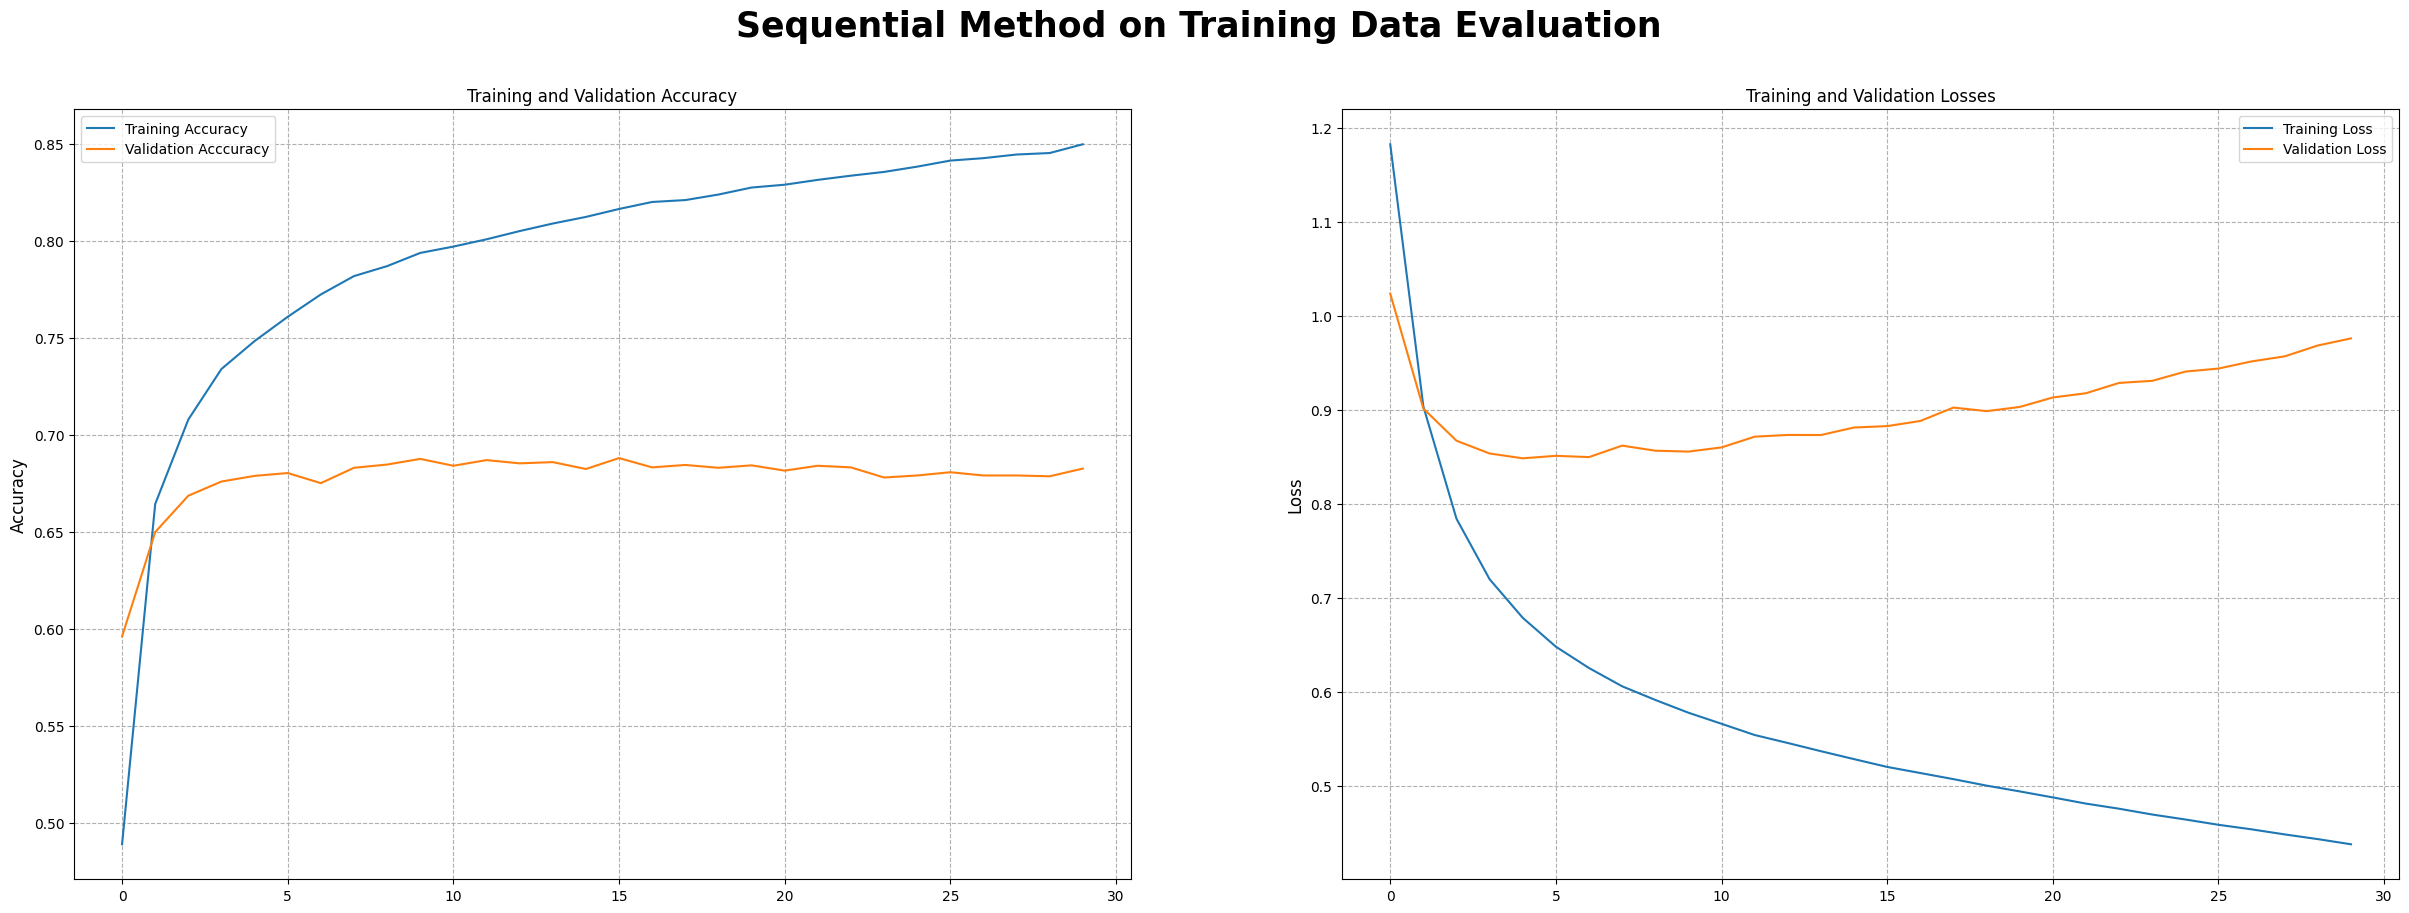

In [148]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model_dnn_hist_1.history['accuracy'],label="Training Accuracy")
plt.plot(model_dnn_hist_1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model_dnn_hist_1.history['loss'], label="Training Loss")
plt.plot(model_dnn_hist_1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

## LSTM

In [149]:
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(LSTM(32,return_sequences=True, activation = 'relu'))
model.add(LSTM(32))
model.add(Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

model_lstm_hist_1 = model.fit(X_train,
                         y_train_ohe,
                         epochs=30,
                         validation_data=(X_test, y_test_ohe))

Epoch 1/30
450/450 [==============================] - 11s 17ms/step - loss: 0.6421 - accuracy: 0.7605 - val_loss: 0.9024 - val_accuracy: 0.6686
Epoch 2/30
450/450 [==============================] - 7s 16ms/step - loss: 0.4801 - accuracy: 0.8282 - val_loss: 0.9512 - val_accuracy: 0.6682
Epoch 3/30
450/450 [==============================] - 7s 16ms/step - loss: 0.4281 - accuracy: 0.8492 - val_loss: 0.9970 - val_accuracy: 0.6690
Epoch 4/30
450/450 [==============================] - 7s 15ms/step - loss: 0.3857 - accuracy: 0.8657 - val_loss: 1.0438 - val_accuracy: 0.6607
Epoch 5/30
450/450 [==============================] - 7s 16ms/step - loss: 0.3469 - accuracy: 0.8797 - val_loss: 1.1351 - val_accuracy: 0.6624
Epoch 6/30
450/450 [==============================] - 7s 16ms/step - loss: 0.3152 - accuracy: 0.8880 - val_loss: 1.2424 - val_accuracy: 0.6484
Epoch 7/30
450/450 [==============================] - 8s 18ms/step - loss: 0.2896 - accuracy: 0.8970 - val_loss: 1.2586 - val_accuracy: 0.645

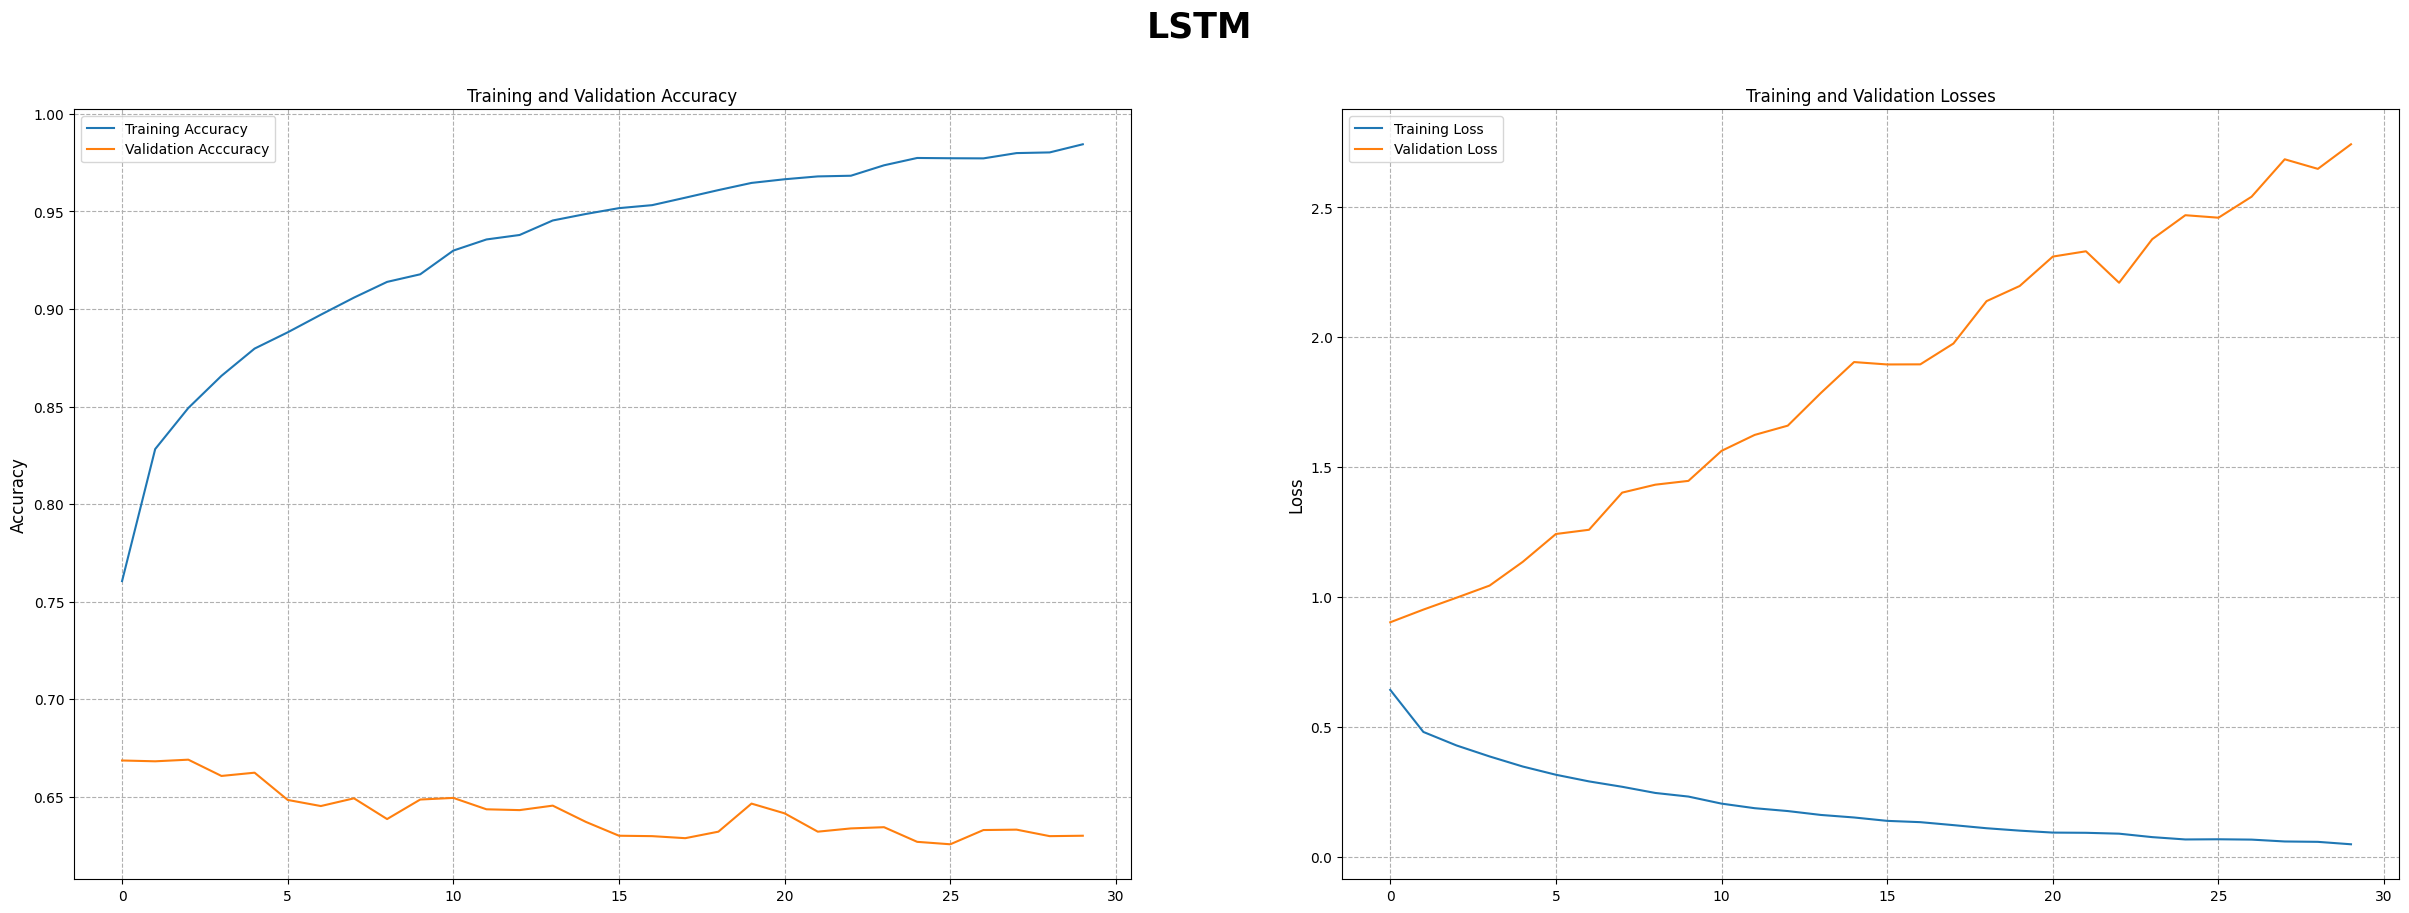

In [150]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('LSTM', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model_lstm_hist_1.history['accuracy'],label="Training Accuracy")
plt.plot(model_lstm_hist_1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model_lstm_hist_1.history['loss'], label="Training Loss")
plt.plot(model_lstm_hist_1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

## GRU

In [151]:
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GRU( 8, return_sequences = True))
model.add(GRU(32,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.compile(loss='categorical_crossentropy',  metrics='accuracy')

model_gru_hist_1 = model.fit(X_train,
                         y_train_ohe,
                         epochs=30,
                         validation_data=(X_test, y_test_ohe))


Epoch 1/30
450/450 [==============================] - 11s 17ms/step - loss: 0.7528 - accuracy: 0.6963 - val_loss: 1.0597 - val_accuracy: 0.6405
Epoch 2/30
450/450 [==============================] - 9s 21ms/step - loss: 0.3915 - accuracy: 0.8599 - val_loss: 1.1471 - val_accuracy: 0.6486
Epoch 3/30
450/450 [==============================] - 10s 23ms/step - loss: 0.3363 - accuracy: 0.8829 - val_loss: 1.2740 - val_accuracy: 0.6521
Epoch 4/30
450/450 [==============================] - 10s 21ms/step - loss: 0.3056 - accuracy: 0.8959 - val_loss: 1.3321 - val_accuracy: 0.6392
Epoch 5/30
450/450 [==============================] - 7s 15ms/step - loss: 0.2858 - accuracy: 0.9015 - val_loss: 1.3729 - val_accuracy: 0.6378
Epoch 6/30
450/450 [==============================] - 6s 13ms/step - loss: 0.2716 - accuracy: 0.9060 - val_loss: 1.5068 - val_accuracy: 0.6449
Epoch 7/30
450/450 [==============================] - 8s 18ms/step - loss: 0.2599 - accuracy: 0.9113 - val_loss: 1.4225 - val_accuracy: 0.6

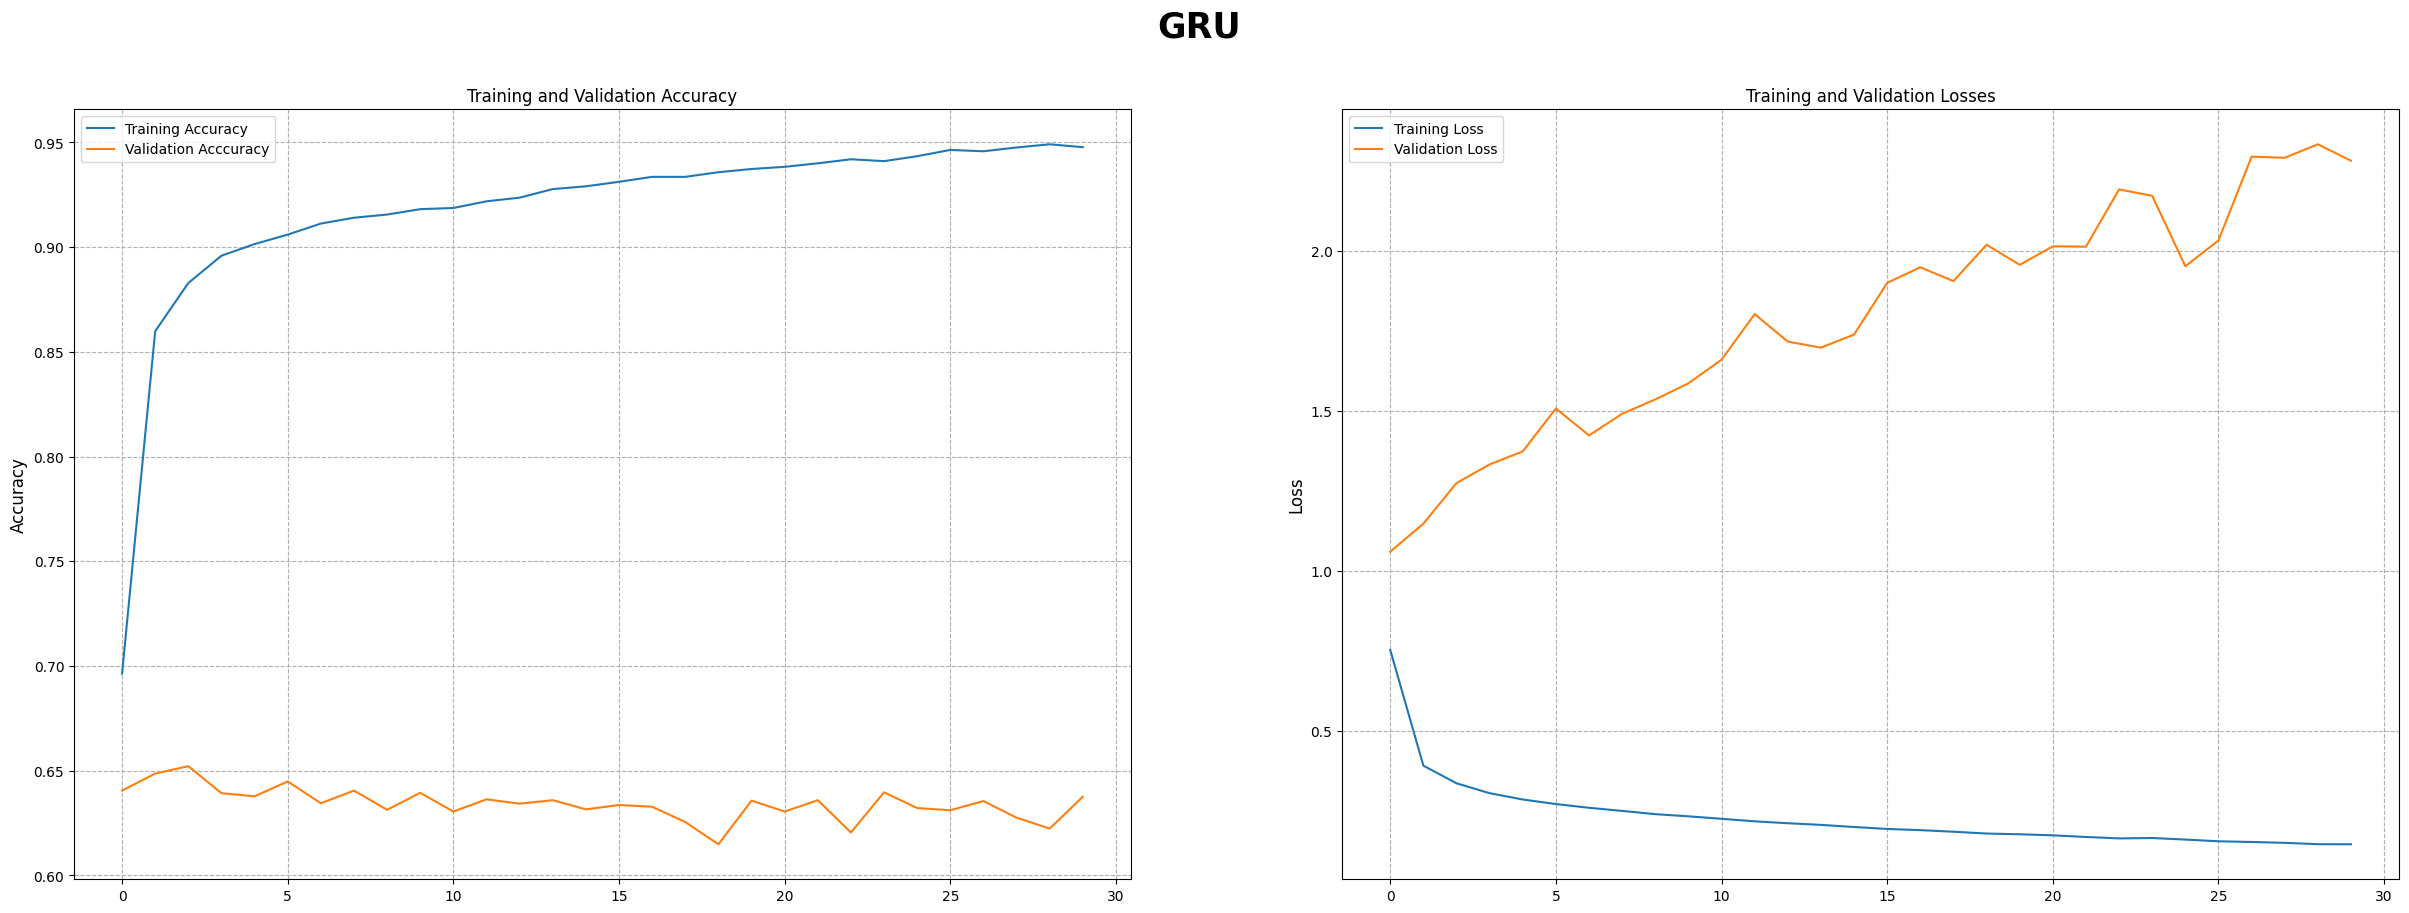

In [152]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('GRU', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model_gru_hist_1.history['accuracy'],label="Training Accuracy")
plt.plot(model_gru_hist_1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model_gru_hist_1.history['loss'], label="Training Loss")
plt.plot(model_gru_hist_1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

# Model Improve

Turns out the best one is DNN, so i will overtuned this model

In here i will do an layer reduction in embedding and on the hidden layer, because of the really overfit evaluation above.

also i will reduce the epoch because if its too much i will do an overfitting as you can in the 3 models above

plus i will add an batch normalization and a optimizer with adamax because Adam optimizer are generally better than every other optimization algorithms, have faster computation time, and require fewer parameters for tuning.

In [154]:
embedding = Embedding(input_dim=jml_vocab,
                      output_dim=8,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [155]:
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GlobalAveragePooling1D())
model.add(Dense(16,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(4,activation='softmax'))
optm = tf.keras.optimizers.Adamax(learning_rate=0.00009)

model.compile(optm, loss='categorical_crossentropy',metrics='accuracy')

model_dnn_hist_2 = model.fit(X_train,
                         y_train_ohe,
                         epochs=15,
                         validation_data=(X_test, y_test_ohe))

Epoch 1/15
450/450 [==============================] - 3s 4ms/step - loss: 1.3812 - accuracy: 0.2907 - val_loss: 1.3693 - val_accuracy: 0.4183
Epoch 2/15
450/450 [==============================] - 2s 4ms/step - loss: 1.3598 - accuracy: 0.3642 - val_loss: 1.3531 - val_accuracy: 0.3881
Epoch 3/15
450/450 [==============================] - 1s 3ms/step - loss: 1.3403 - accuracy: 0.4073 - val_loss: 1.3350 - val_accuracy: 0.4133
Epoch 4/15
450/450 [==============================] - 2s 4ms/step - loss: 1.3201 - accuracy: 0.4296 - val_loss: 1.3152 - val_accuracy: 0.4298
Epoch 5/15
450/450 [==============================] - 1s 3ms/step - loss: 1.2993 - accuracy: 0.4397 - val_loss: 1.2966 - val_accuracy: 0.4383
Epoch 6/15
450/450 [==============================] - 2s 3ms/step - loss: 1.2778 - accuracy: 0.4491 - val_loss: 1.2740 - val_accuracy: 0.4460
Epoch 7/15
450/450 [==============================] - 2s 3ms/step - loss: 1.2558 - accuracy: 0.4587 - val_loss: 1.2548 - val_accuracy: 0.4552
Epoch 

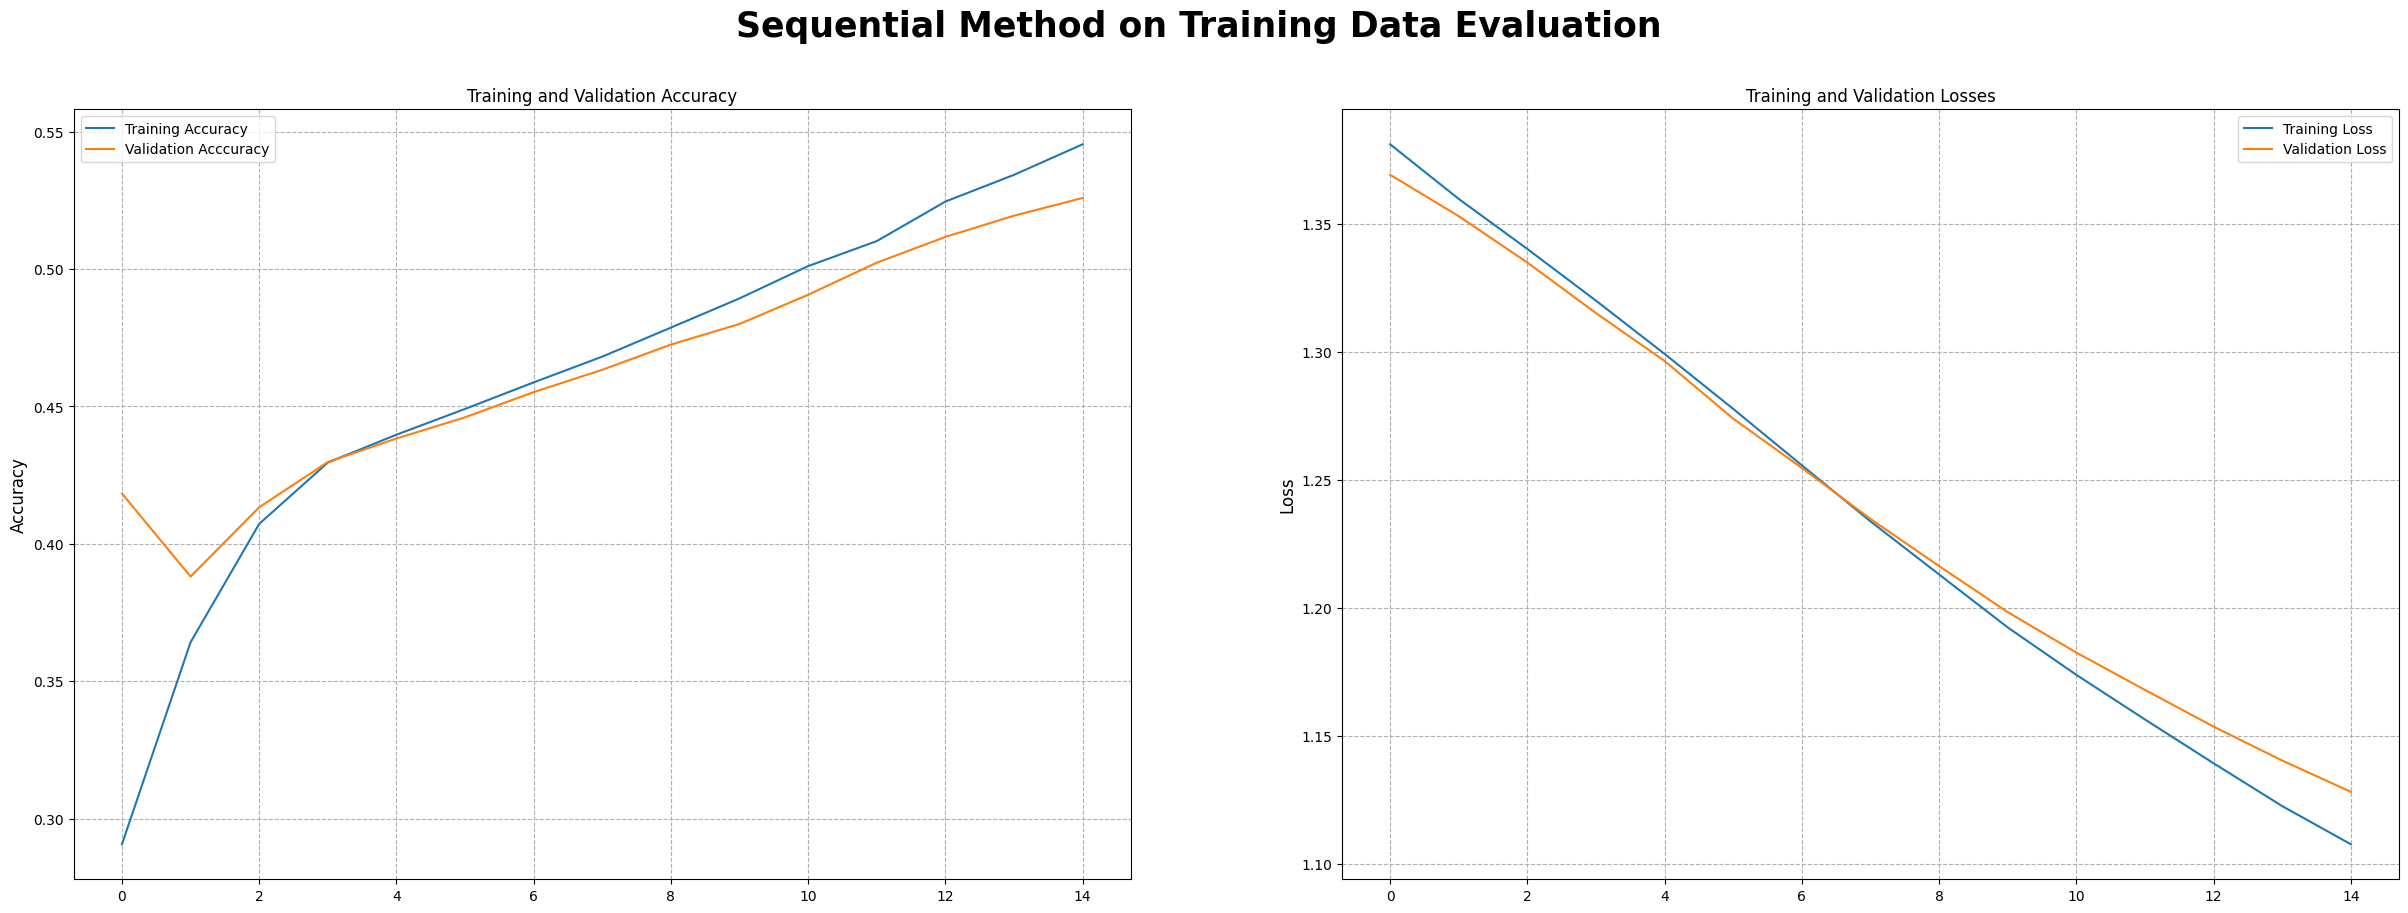

In [156]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(model_dnn_hist_2.history['accuracy'],label="Training Accuracy")
plt.plot(model_dnn_hist_2.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(model_dnn_hist_2.history['loss'], label="Training Loss")
plt.plot(model_dnn_hist_2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

# Model Evaluation

In [157]:
y_pred = model.predict(X_test)
y_pred.shape

150/150 [==============================] - 0s 2ms/step


(4798, 4)

In [158]:
y_pred =np.argmax(y_pred,axis=1)

Accuracy Score - Test Set   :  0.5258441017090454 

Classification Report : 
               precision    recall  f1-score   support

           0       0.47      0.25      0.33       779
           1       0.46      0.25      0.32       945
           2       0.56      0.86      0.68      2045
           3       0.45      0.32      0.38      1029

    accuracy                           0.53      4798
   macro avg       0.49      0.42      0.43      4798
weighted avg       0.50      0.53      0.49      4798
 

Confusion Matrix      : 



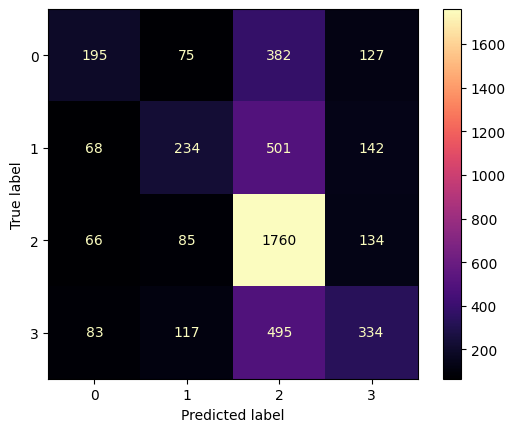

In [159]:
print('Accuracy Score - Test Set   : ', accuracy_score(y_test, y_pred), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred), '\n')
print('Confusion Matrix      : \n' )
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')
plt.show()

# Inference

In [160]:
sentence = "i feel sad"

In [161]:
preprocess(sentence)

'feel sad'

In [162]:
inference_pred = model.predict(np.array([[sentence]]))

1/1 [==============================] - 0s 19ms/step


In [163]:
inference_pred

array([[0.1036401 , 0.30006996, 0.1819691 , 0.41432083]], dtype=float32)

In [164]:
res = np.argmax(inference_pred,axis=1)
result = res[0]

if result == 0:
  print(' Anger / Disgust ')
elif result == 1:
  print(' Fear / Surprise')
elif result == 2:
  print(' Happiness')
else :
  print(' Sadness ')

 Sadness 


# Conclusion

This data prediction strangely fits on the base model (DNN) even though it should be a perfect fit for the LSTM or GRU because this was a sentiment analysis that have rank in every sentences.

and also my prediction earlier was right, becbecause of the lack of small amount data that provided, all the model have an overfit permformace, but happily in the data inference it predict he emotion of one sentences very well and also strangely on the classification report it have a "not bad" percentage 

For Further improvement i think theres nothing you can really do for this modelling nor the data preprocessing, because of the data. So, my advice for this future improvement is that we have to find another dataset that have a better amount of learning supply.